In [1]:
from IPython.display import Latex
from IPython.display import Math
from scipy.stats import beta
from scipy.stats import binom
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

---
The Beta Distribution and Conjugacy
=====
***

In a Bernoulli distribution, and also a Binomial distribution, the maximum liklihood setting for the parameter $\mu$ is given by the fraction of observations in the dataset have a value of 1.

$\mu_{ML}=\frac{m}{N}$

#####FOR SMALL DATASETS THIS CAN GIVE SEVERELY OVERFITTED RESULTS.

e.g. suppose the Dataset $D = {1, 1, 1}$

$\mu = 1$, and hence, according to maximum likelihood all future observations should be 1

WE NEED A BAYESIAN ESTIMATE FOR $mu$

#####Introduce a prior distribution over the parameter $mu$

What form should this prior take?

It would be nice if it was simple to interpret AND had some nice analytical properties as well

This brings up the import concept and role of CONJUGATE PRIORS

#####A conjugate prior leads to the posterior distribution having the same functional form as the pior

By having and using a conjugate prior allows for greatly simplified Bayesian analysis

What would be a good pior for the Bernoulli Distribution or the more general version of it, the Binomial Distribution?

The Binomial Distribution is the distribution of m (successes) given N trials (N instances of the Bernoulli Distribution), where the probability of success in a given trial is $\mu$

$Bin(m|N,\mu) = \binom{N}{m}*\mu^{m}(1-\mu)^{N-m}$, where $\binom{N}{m}=\frac{N!}{(N-m)!m!}$

#####For example, if you have 6 trials, a probability of success at each trial of 0.5, what is the probability of 3 successes?

In [32]:
p = 0.5
N = 6
m = 2
print binom.pmf(m, N, p)

0.234375


Look at the form of the likelihood function: $\mu^{x}(1-\mu)^{1-x}$

This is a product of factors. If we choose a prior to be proportional to the powers of $\mu$ and $(1-\mu)$, then the posterior will have the same functional form

####THIS PROPERTY IS CALLED CONJUGACY

In this case the choice of prior is the Beta Distribution

$Beta(u|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$

$\Gamma(x)$ is the $\Gamma$ function

$mean=\frac{a}{a+b}$

$var=\frac{ab}{(a+b)^2(a+b+1)}$

$a$ and $b$ are called hyperparameters because the control the distribution of the parameter $\mu$.

####The Beta Distribution

In [2]:
#import beta from scipy.stats

#initialize the hyper-parameters a, and b
#a, b != 0
a = 0.5
b = 0.5

#What is the mean of a beta distribution with a and b?
mean, var = beta.stats(a, b, moments="mv")

print "the mean is ", mean
print "the variance is ", var

the mean is  0.5
the variance is  0.125


####Plotting the Beta Distribution

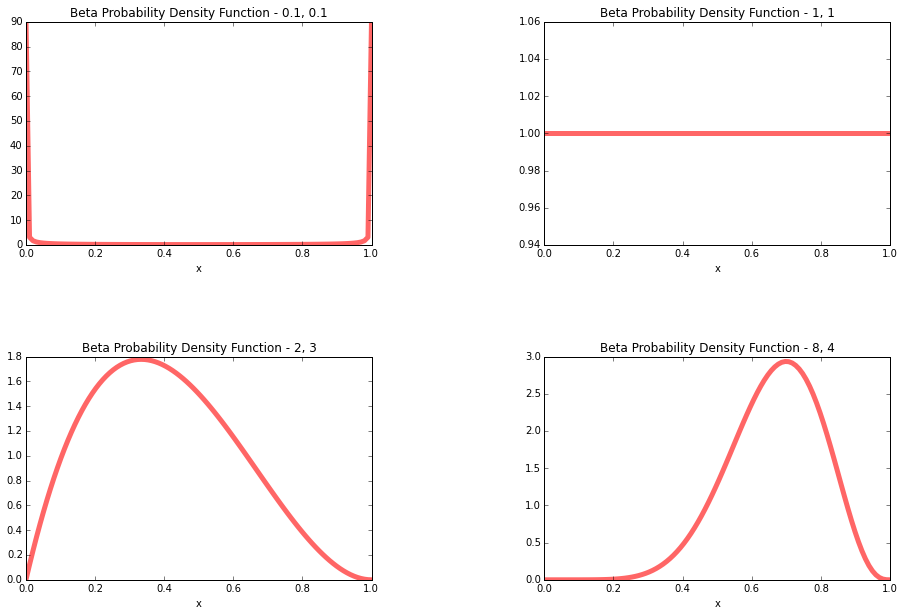

In [3]:
fig1 = plt.figure(1, figsize=(12,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
plt.subplots_adjust(left=0.00, right=1, wspace=0.5, hspace=0.5)

#ppf is the percent point function, which is the inverse of the cdf, or cumulative density function
#returns the x points at 0.01% of the distribution and 99% of the distribution
#for plotting purposes
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

#beta, a = 0.01, b = 0.1
ax1.plot(x, beta.pdf(x, 0.1, 0.1),'r-', lw=5, alpha=0.6, label='beta pdf')
ax1.set_title("Beta Probability Density Function - 0.1, 0.1")
ax1.set_xlabel('x')

#beta, a = 1.0, b = 1.0
ax2.plot(x, beta.pdf(x, 1., 1.),'r-', lw=5, alpha=0.6, label='beta pdf')
ax2.set_title("Beta Probability Density Function - 1, 1")
ax2.set_xlabel('x')

#beta, a = 2.0, b = 3.0
ax3.plot(x, beta.pdf(x, 2, 3),'r-', lw=5, alpha=0.6, label='beta pdf')
ax3.set_title("Beta Probability Density Function - 2, 3")
ax3.set_xlabel('x')

#beta, a = 8.0, b = 4.0
ax4.plot(x, beta.pdf(x, 8, 4),'r-', lw=5, alpha=0.6, label='beta pdf')
ax4.set_title("Beta Probability Density Function - 8, 4")
ax4.set_xlabel('x')

The posterior distribution is obtained by multiplying the Beta Prior by the Binomial Likelihood function (and normalizing).

The distribution has the form:

$p(\mu|m,l,a,b)\propto \mu^{m+a-1}(1-\mu)^{l+b+1}$

$l = N - m$

So:

* $N$ is the number of trials
* $m$ is the number of successes
* $l$ is the number of failures

Functionally the posterior has the same dependence upon $\mu$ as the prior, reflecting the conjugacy properties of the prior with respect to the likelihood

The posterior is actually just another Beta Distribution that can be normalized:

$p(\mu|m.l,a,b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}$

So the effect of observing the data, which means we have new values for m and l (the data resulted in either a success or failure), is to add m to the value of a, and l to the value of b.

The hyper-paramters a, and b, may be therefore interpretted as the number of observations of success and failure, respectively, i.e. a is the number of observations where $x=1$, and b is the number of observations where $x=0$ (successes or failures, heads or tails, clicks or not).

##Sequential Bayes

#####PRIOR:

In [34]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

#for example
#a=2, b=2
prior = beta.pdf(x, 2, 2)

#####LIKELIHOOD:

In [35]:
x1 = np.linspace(0.0, 1.0, 11)

#A single observation of 1 trial and 1 success
#m = 1, N = 1
likelihood = binom.pmf(1, 1, x1)

#####POSTERIOR:

In [55]:
#a = 3, b = 2
posterior = beta.pdf(x, 3, 2)
mean, variance = beta.stats(3, 2, moments="mv")
print "Mean = {:5.5f}, Variance = {:5.5f}".format(float(mean), float(variance))

Mean = 0.60000, Variance = 0.04000


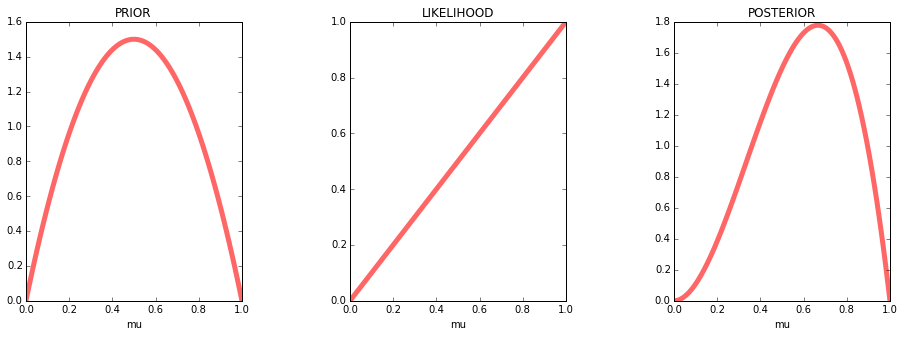

In [38]:
fig1 = plt.figure(1, figsize=(12,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
plt.subplots_adjust(left=0.00, right=1, wspace=0.5, hspace=0.5)

x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
x1 = np.linspace(0.0, 1.0, 11)

ax1.plot(x, prior,'r-', lw=5, alpha=0.6, label='beta pdf')
ax1.set_title("PRIOR")
ax1.set_xlabel('mu')

ax2.plot(x1, likelihood,'r-', lw=5, alpha=0.6, label='beta pdf')
ax2.set_title("LIKELIHOOD")
ax2.set_xlabel('mu')

ax3.plot(x, posterior,'r-', lw=5, alpha=0.6, label='beta pdf')
ax3.set_title("POSTERIOR")
ax3.set_xlabel('mu')

NEW PIOR

In [40]:
#equals the previous posterior
prior = beta.pdf(x, 3, 2)

NEW LIKLIHOOD

In [41]:
#N = 1, m = 1. A single trial yielding a single success
likelihood = binom.pmf(1, 1, x1)

NEW POSTERIOR

In [47]:
#a = 3 + 1, b = 2 + 0
posterior = beta.pdf(x, 4, 2)

In [54]:
mean, variance = beta.stats(4, 2, moments="mv")
print "Mean = {:5.5f}, Variance = {:5.5f}".format(float(mean), float(variance))

Mean = 0.66667, Variance = 0.03175


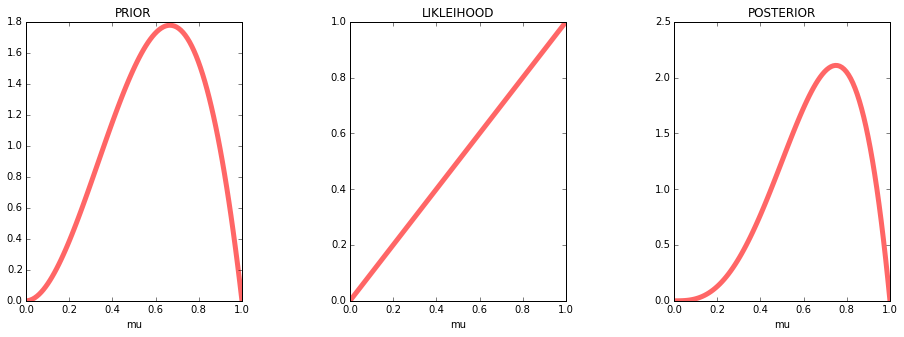

In [44]:
fig1 = plt.figure(1, figsize=(12,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
plt.subplots_adjust(left=0.00, right=1, wspace=0.5, hspace=0.5)
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

ax1.plot(x, prior,'r-', lw=5, alpha=0.6, label='beta pdf')
ax1.set_title("PRIOR")
ax1.set_xlabel("mu")

ax2.plot(x1, likelihood,'r-', lw=5, alpha=0.6, label='beta pdf')
ax2.set_title("LIKLEIHOOD")
ax2.set_xlabel("mu")

ax3.plot(x, posterior,'r-', lw=5, alpha=0.6, label='beta pdf')
ax3.set_title("POSTERIOR")
ax3.set_xlabel("mu")